#  Business Problem Understanding


-Indentify relationship between total advertising spend and sales?

-Our next ad campaign will have a total spend of $200,000, how many units do we expect to sell as a result of this?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

**Load The Data**

In [2]:
df=pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df.shape

(200, 4)

##  Data Understanding

This dataset contains advertising data with four key features:

###  **Features Description**
- **TV**: Advertising budget spent on TV (in dollars).
- **Radio**: Advertising budget spent on radio (in dollars).
- **Newspaper**: Advertising budget spent on newspapers (in dollars).
- **Sales**: The corresponding sales achieved (in dollars).


###  **Initial Observations**
- The dataset includes **continuous numerical data**.
- The **sales** column is likely the **target variable**, while the other three columns represent **predictor variables**.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [5]:
df['total_spend']=df['TV']+df['radio']+df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [6]:
df.columns.tolist()

['TV', 'radio', 'newspaper', 'sales', 'total_spend']

In [7]:
df.drop(['TV', 'radio', 'newspaper'],axis=1,inplace=True)
df.head()

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


In [8]:
continuous=['sales','total_spend']

In [9]:
df[continuous].describe()

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


In [10]:
df[continuous].skew()

sales          0.407571
total_spend    0.049488
dtype: float64

<Axes: xlabel='total_spend', ylabel='sales'>

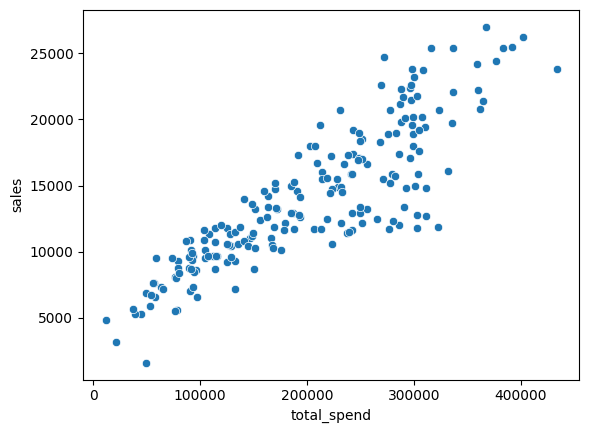

In [11]:
sns.scatterplot(x="total_spend",y="sales",data=df)

In [12]:
df[continuous].corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


In [13]:
df.corrwith(df['sales'])

sales          1.000000
total_spend    0.867712
dtype: float64

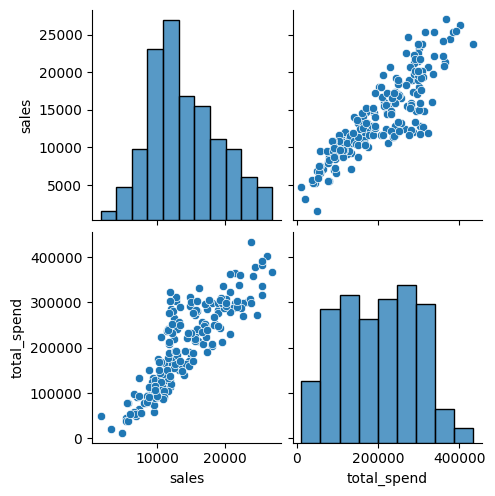

In [14]:
sns.pairplot(df)

In [15]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
X=df[['total_spend']]
y=df['sales']
print(X.head())
print(y.head())

   total_spend
0       337100
1       128900
2       132400
3       251300
4       250000
0    22100
1    10400
2     9300
3    18500
4    12900
Name: sales, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=77)
print(X_train.head(),end=" ")
print(y_train.head())
print(X_test.head(),end=" ")
print(y_test.head())

     total_spend
50        237500
115       162800
5         132600
6         113800
114       159500 50     11400
115    12600
5       7200
6      11800
114    14600
Name: sales, dtype: int64
     total_spend
127        89400
16        218400
20        299500
90        148500
48        292900 127     8800
16     12500
20     18000
90     11200
48     14800
Name: sales, dtype: int64


In [19]:
X_train.shape

(160, 1)

## Modelling

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
print("Coefficient:- ",model.coef_)
print("Intercept:- ",model.intercept_)

Coefficient:-  [0.04784052]
Intercept:-  4389.814518436082


#### Interpreting the Coefficients

-**A 1 unit increase in total Spend is associated with an Increase of 0.04784 units in sales.**

-**This basically means that for every $10000 dollars spend on Ads, we could expect 478 more units sold.**

# Evaluation

In [21]:
ypred_train=model.predict(X_train)

from sklearn.metrics import mean_squared_error,r2_score
train_rmse=np.sqrt(mean_squared_error(y_train,ypred_train))
# train_r2_score=np.sqrt(r2_score(y_train,ypred_train))
train_r2_score=r2_score(y_train,ypred_train)

print("Train RMSE:- ",train_rmse)
print("Train r2 score:- ",train_r2_score)


Train RMSE:-  2628.0117251844995
Train r2 score:-  0.7426281082244577


In [22]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model,X_train,y_train,cv=5,scoring="r2").mean()
# cv_score=cross_val_score(model,X_train,y_train,cv=5,scoring="r2").max()~This approach only picks the best score, ignoring the overall performance.
print("CV Score:- ",cv_score)

CV Score:-  0.7326556921038282


In [23]:
ypred_test=model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
test_rmse=np.sqrt(mean_squared_error(y_test,ypred_test))
# test_r2_score=np.sqrt(r2_score(y_test,ypred_test))
test_r2_score=r2_score(y_test,ypred_test)

print("test RMSE:- ",test_rmse)
print("test r2 score:- ",test_r2_score)


test RMSE:-  2422.590173704026
test r2 score:-  0.7868779454628924


# Prediction

In [24]:
model.predict([[200000]])

array([13957.91946809])

In [25]:
result_data={'Train':[train_rmse,train_r2_score],'Test':[test_rmse,test_r2_score],'CV_Score':[cv_score,''],'Score':['RMSE','R2']}
result=pd.DataFrame(result_data)
result.set_index('Score',inplace=True)
result

,Train,Test,CV_Score
Score,,,
RMSE,2628.011725,2422.590174,0.732656
R2,0.742628,0.786878,


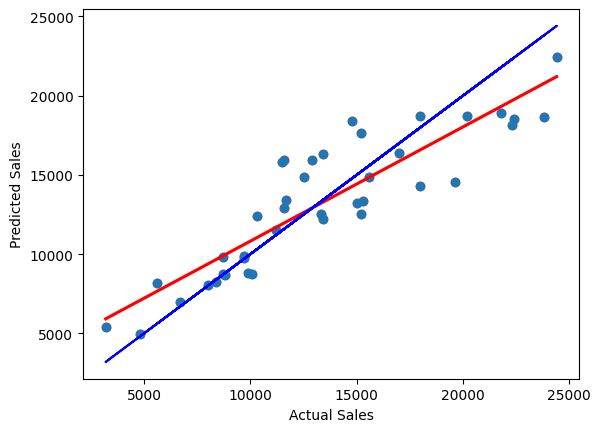

In [26]:
sns.regplot(x=y_test,y=ypred_test,ci=None,color ='red')
plt.scatter(y_test,ypred_test)
plt.plot(y_test,y_test,color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

In [27]:
from joblib import dump
dump(model,"sales_model_SLR.joblib")

['sales_model_SLR.joblib']